In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

### Read Data



In [2]:
df=pd.read_csv('G:/ترم 7/1/heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Data processing

In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: >

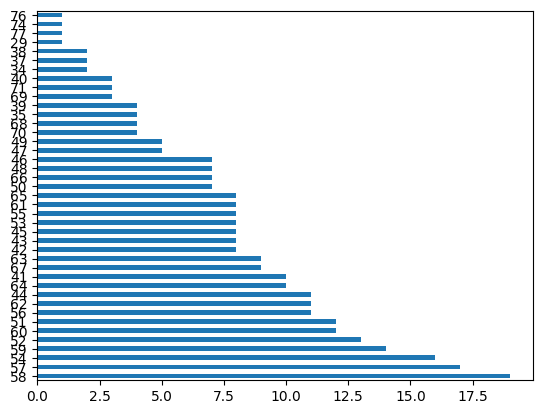

In [27]:
df['age'].value_counts().plot(kind='barh')

<Axes: ylabel='sex'>

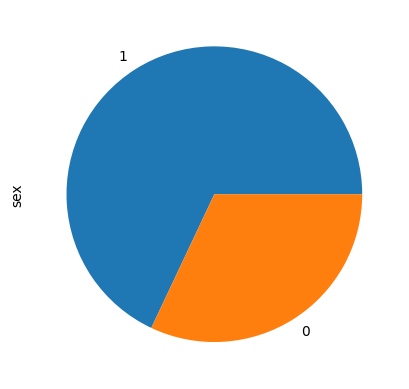

In [29]:
df['sex'].value_counts().plot(kind='pie')

<Axes: xlabel='index', ylabel='trestbps'>

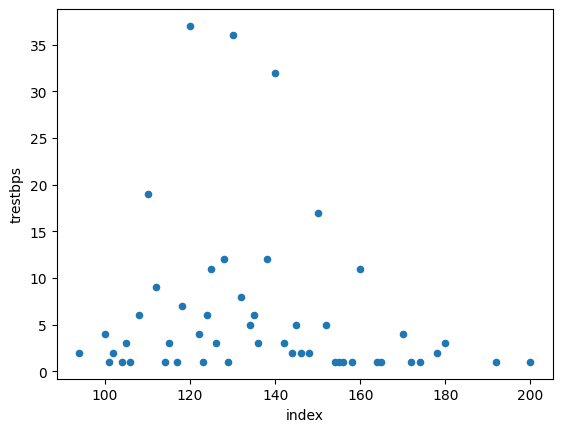

In [33]:
df['trestbps'].value_counts().reset_index().plot(kind='scatter',x='index',y='trestbps')

<Axes: xlabel='index', ylabel='chol'>

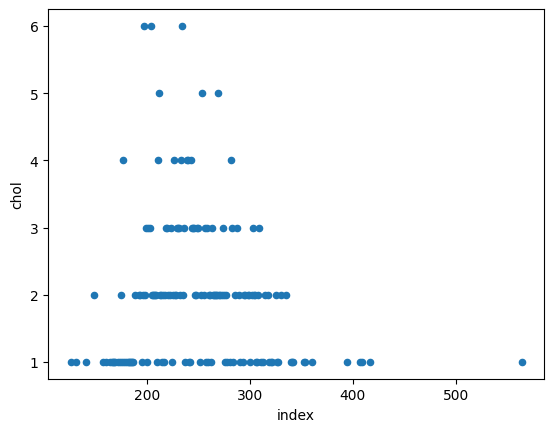

In [34]:
df['chol'].value_counts().reset_index().plot(kind='scatter',x='index',y='chol')

<Axes: ylabel='fbs'>

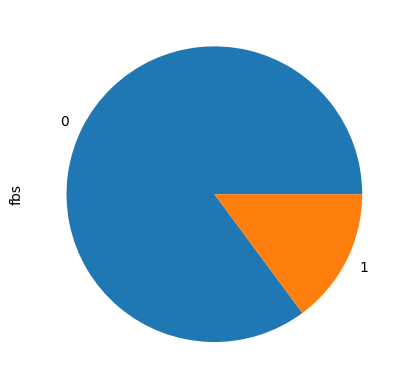

In [35]:
df['fbs'].value_counts().plot(kind='pie')

<Axes: ylabel='restecg'>

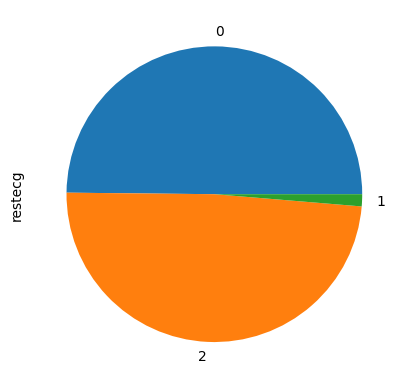

In [36]:
df['restecg'].value_counts().plot(kind='pie')

<Axes: xlabel='index', ylabel='thalach'>

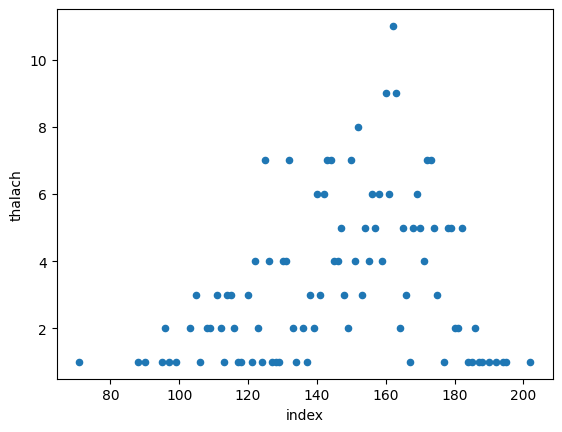

In [37]:
df['thalach'].value_counts().reset_index().plot(kind='scatter',x='index',y='thalach')

<Axes: ylabel='exang'>

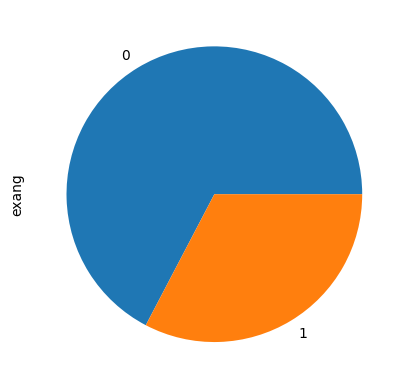

In [38]:
df['exang'].value_counts().plot(kind='pie')

<Axes: xlabel='index', ylabel='oldpeak'>

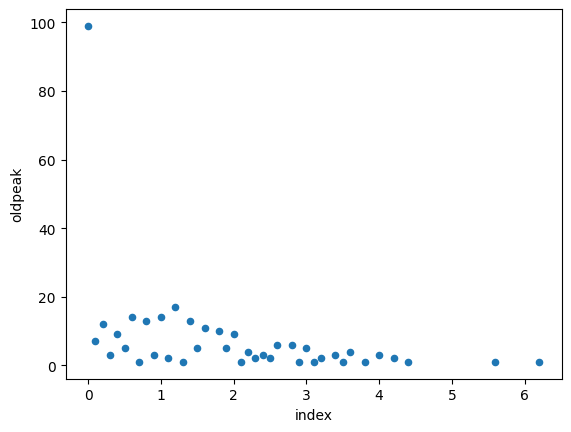

In [39]:
df['oldpeak'].value_counts().reset_index().plot(kind='scatter',x='index',y='oldpeak')

<Axes: ylabel='slope'>

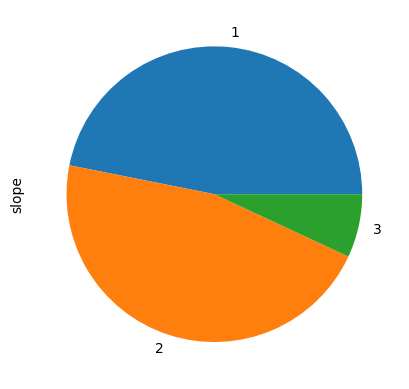

In [40]:
df['slope'].value_counts().plot(kind='pie')

<Axes: ylabel='ca'>

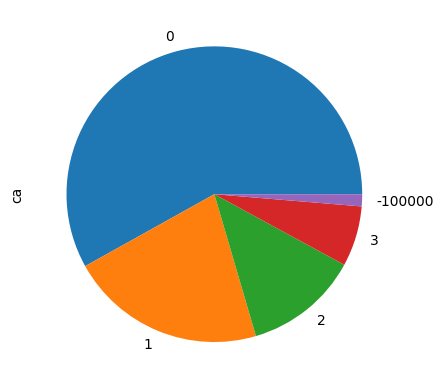

In [41]:
df['ca'].value_counts().plot(kind='pie')

<Axes: >

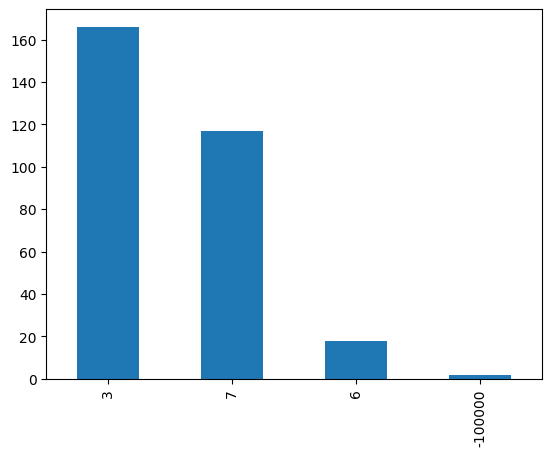

In [42]:
df['thal'].value_counts().plot(kind='bar')

<Axes: ylabel='num'>

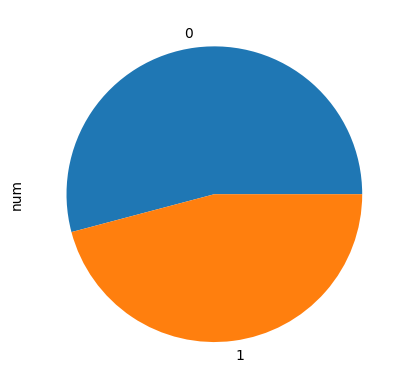

In [43]:
df['num'].value_counts().plot(kind='pie')

In [4]:
df.shape

(303, 14)

## split target data and natrual data

In [5]:
X=df.drop(columns=['num'])
y=df.num


In [6]:
X.shape

(303, 13)

In [7]:
y.shape

(303,)

## data for train and data for test algorithm

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [9]:
from sklearn.linear_model import LogisticRegression
la=LogisticRegression()
la.fit(X_train,y_train)

C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
la.score(X_test,y_test)

0.7763157894736842

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(la,X_train,y_train,cv=5,scoring='accuracy')

C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.7826087 , 0.7826087 , 0.84444444, 0.77777778, 0.82222222])

In [13]:
from sklearn.tree import DecisionTreeClassifier
De=DecisionTreeClassifier(criterion='entropy')
De.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
y_pred=De.predict(X_test)
report_decisiontree=classification_report(y_test,y_pred)


In [16]:
print(report_decisiontree)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        40
           1       0.71      0.75      0.73        36

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


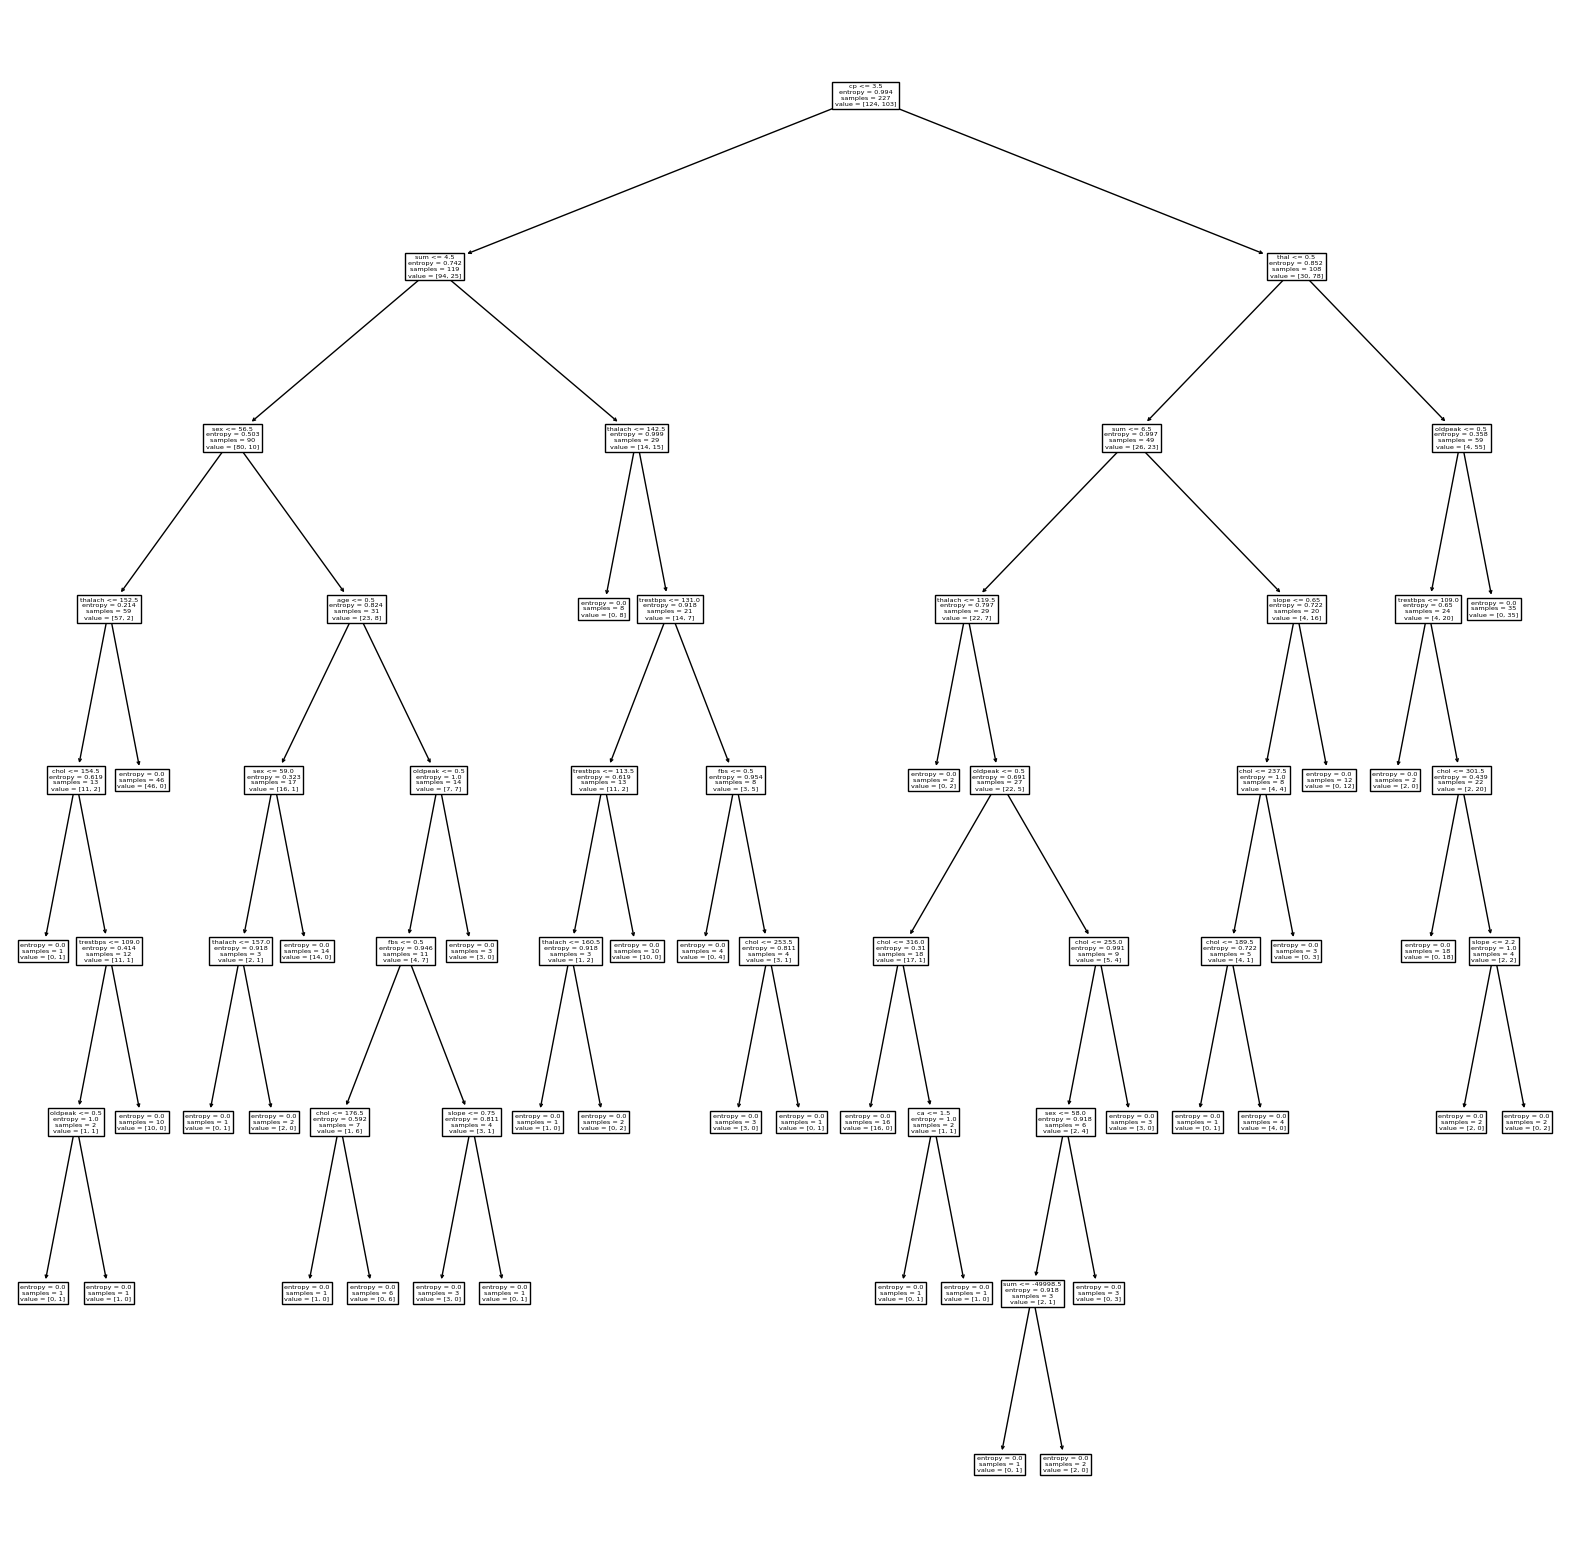

In [18]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(De,ax=ax,feature_names=['sex','age','cp','trestbps','chol','fbs','restceg','thalach','oldpeak','slope','ca','thal','sum'])
plt.show()

<Figure size 1000x1000 with 0 Axes>

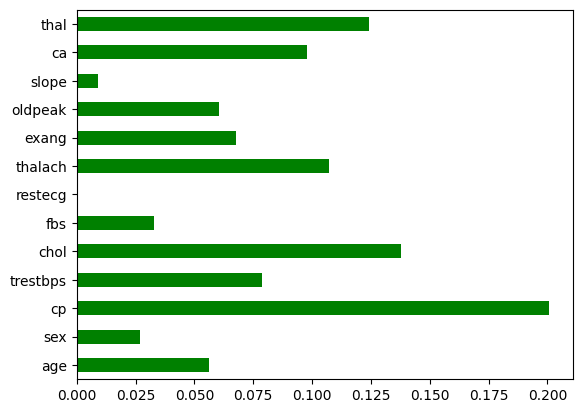

<Figure size 1000x1000 with 0 Axes>

In [19]:
feature_importances=pd.Series(De.feature_importances_,index=X_train.columns)
feature_importances.plot(kind='barh',color='green')
plt.figure(figsize=[10,10])

In [20]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

In [21]:
cross_val_score(naive,X_train,y_train,cv=5,scoring='accuracy')

array([0.43478261, 0.45652174, 0.44444444, 0.77777778, 0.48888889])

In [22]:
y_pred=naive.predict(X_test)
report_decisiontree=classification_report(y_test,y_pred)

In [23]:
print(report_decisiontree)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.47      0.97      0.63        36

    accuracy                           0.46        76
   macro avg       0.23      0.49      0.32        76
weighted avg       0.22      0.46      0.30        76

